In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the dataset

In [85]:
data = pd.read_csv("employee_attrition.csv")

In [3]:
# Display the first few rows
data.head()

,EmployeeID,Age,Gender,Department,MonthlyIncome,YearsAtCompany,OverTime,JobSatisfaction,WorkLifeBalance,TrainingTimesLastYear,Attrition
0,1,38.0,Male,HR,0.000000,0.40,No,2.0,3,0.5,No
1,2,33.0,Male,HR,0.075385,0.25,No,2.0,2,0.3,No
2,3,40.0,Female,Sales,0.136375,0.70,No,1.0,2,0.5,No
3,4,47.0,Male,HR,0.174409,0.60,No,3.0,3,0.2,No
4,5,33.0,Female,IT,0.153290,0.20,No,NaN,3,0.1,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   EmployeeID             8400 non-null   int64  
 1   Age                    7561 non-null   float64
 2   Gender                 8400 non-null   object 
 3   Department             8400 non-null   object 
 4   MonthlyIncome          7556 non-null   float64
 5   YearsAtCompany         8400 non-null   float64
 6   OverTime               8400 non-null   object 
 7   JobSatisfaction        7567 non-null   float64
 8   WorkLifeBalance        8400 non-null   int64  
 9   TrainingTimesLastYear  8400 non-null   float64
 10  Attrition              8400 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 722.0+ KB


In [5]:
data.describe()

,EmployeeID,Age,MonthlyIncome,YearsAtCompany,JobSatisfaction,WorkLifeBalance,TrainingTimesLastYear
count,8400.000000,7561.000000,7556.000000,8400.000000,7567.000000,8400.000000,8400.000000
mean,3994.265952,34.657849,0.191155,0.296810,2.189771,2.543690,0.226202
std,2311.555446,7.633779,0.157068,0.204295,1.015183,0.982885,0.148470
min,1.000000,22.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1987.750000,29.000000,0.062035,0.150000,1.000000,2.000000,0.100000
50%,3990.500000,34.000000,0.167131,0.300000,2.000000,3.000000,0.200000
75%,6002.000000,40.000000,0.288324,0.450000,3.000000,3.000000,0.300000
max,8000.000000,60.000000,1.000000,1.000000,4.000000,4.000000,1.000000


### Remove irrelevant features

In [6]:
data.drop("EmployeeID", axis=1, inplace=True)

#### Handle Missing Values
In this step, we check for missing values and decide on an appropriate imputation or removal strategy.

In [7]:
data.isnull().sum()

Age                      839
Gender                     0
Department                 0
MonthlyIncome            844
YearsAtCompany             0
OverTime                   0
JobSatisfaction          833
WorkLifeBalance            0
TrainingTimesLastYear      0
Attrition                  0
dtype: int64

In [8]:
# In percentage
data.isnull().mean()*100

Age                       9.988095
Gender                    0.000000
Department                0.000000
MonthlyIncome            10.047619
YearsAtCompany            0.000000
OverTime                  0.000000
JobSatisfaction           9.916667
WorkLifeBalance           0.000000
TrainingTimesLastYear     0.000000
Attrition                 0.000000
dtype: float64

#### Lets visualize the missing values for easy communications with HR/Stakeholders

<Axes: >

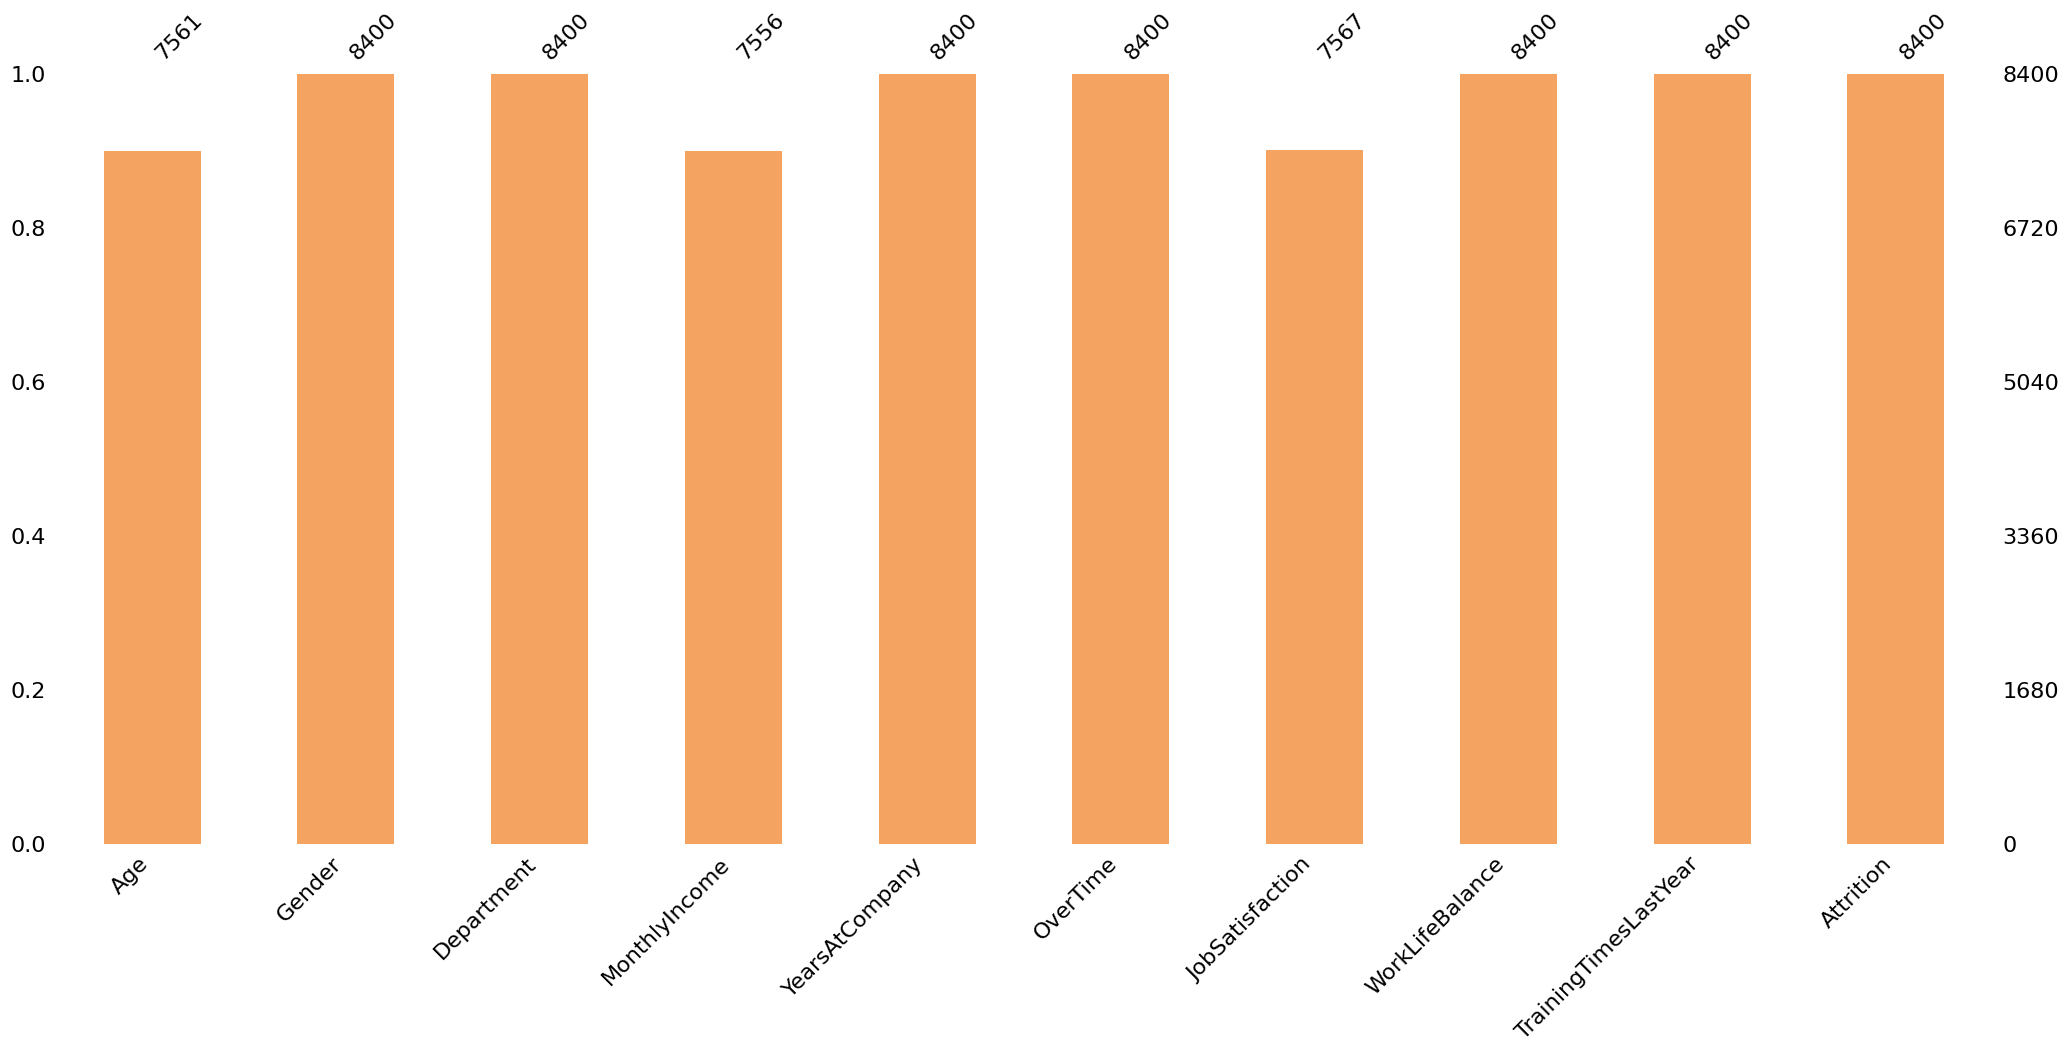

In [9]:
import missingno as msno

msno.bar(data, color='sandybrown')

<Axes: >

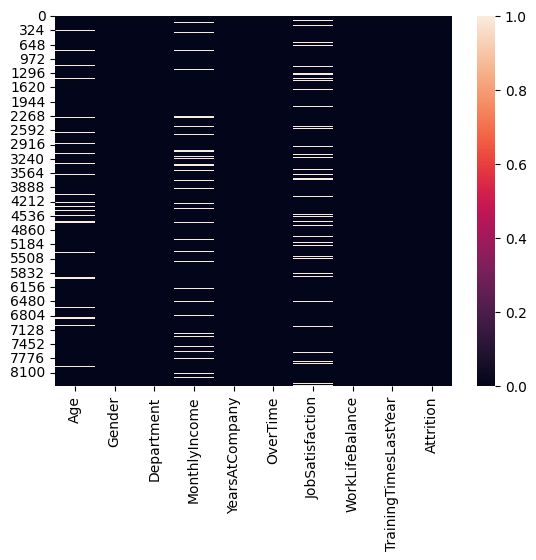

In [10]:
# Display columns with missing values
sns.heatmap(data.isnull())

#### Imputation Strategies
**Numerical Columns:**
- Use `mean`, `median`, or `mode` to impute.
- For features like `Age`, median is often more robust against outliers.

**Categorical Columns:**
- Impute with the mode or create a new category (e.g., "Unknown").

**Advanced Options:**
- Use K-Nearest Neighbors (KNN) Imputation or regression models for more accurate imputation.

In [11]:
# Impute missing numerical values with median
data['Age'] = data['Age'].fillna(data['Age'].median())
data['MonthlyIncome'] = data['MonthlyIncome'].fillna(data['MonthlyIncome'].median())

In [12]:
# Impute missing categorical values with mode
data['JobSatisfaction'] = data['JobSatisfaction'].fillna(data['JobSatisfaction'].mode()[0])

### Handling Duplicate Data
Detect Duplicates

In [13]:
# Check for duplicate rows
data.duplicated().sum()

408

### Remove Duplicates
- Duplicates can often be dropped unless there’s a need to retain them for specific analysis.

In [14]:
# Remove duplicate rows
data = data.drop_duplicates().reset_index(drop=True)

### Handle Outliers
Check for outliers in numerical columns.<br>
Lets investigate the numerical columns for outliers by visualizing their distributions on histplot

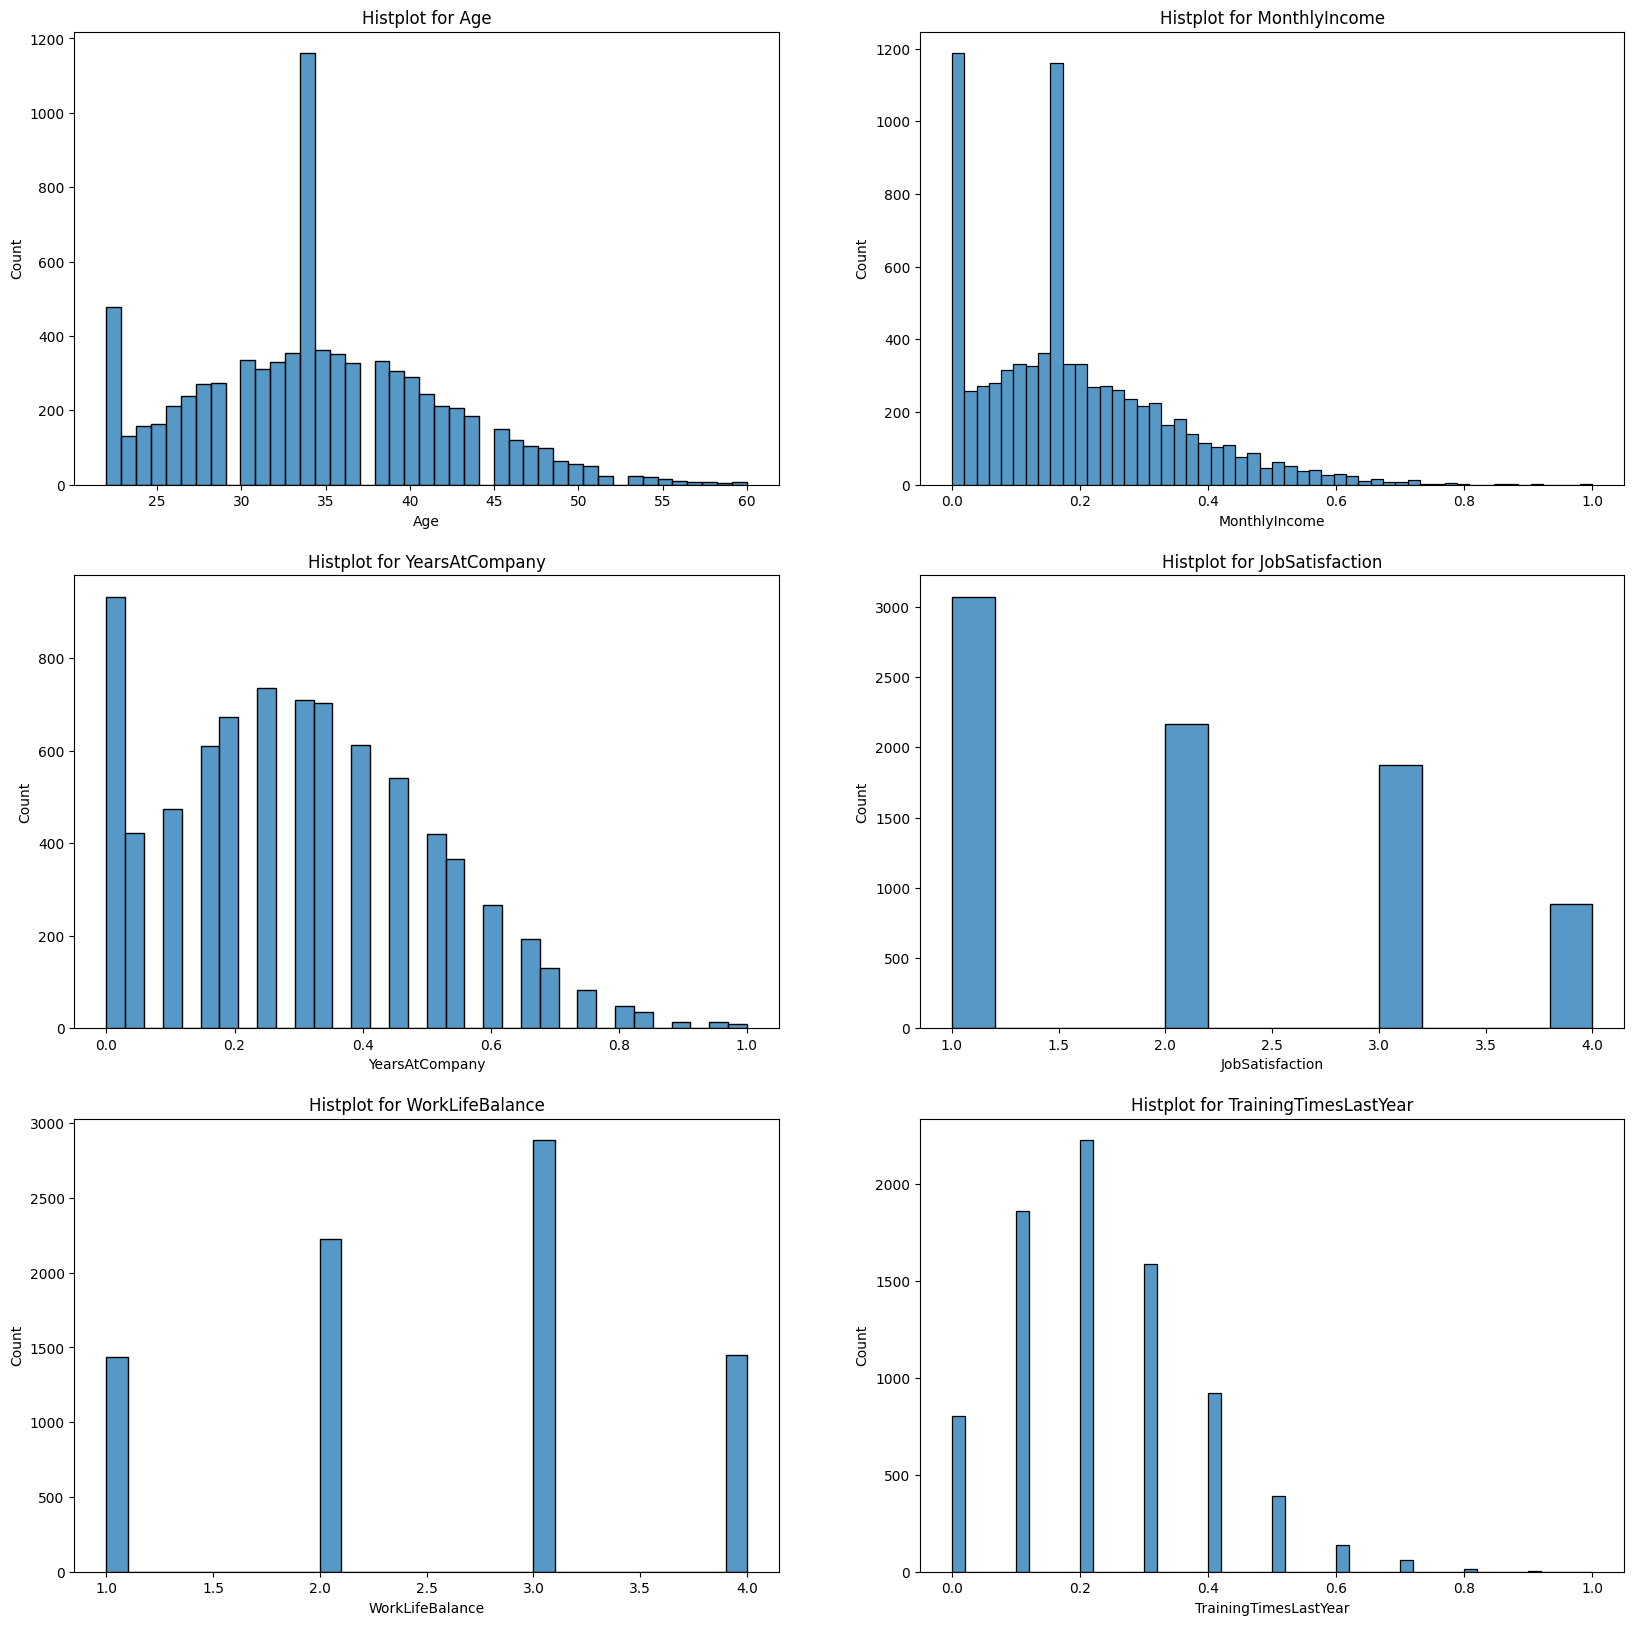

In [15]:
numerical_columns = data.select_dtypes(include="number")
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
ax=ax.flatten()
for idx, col in enumerate(numerical_columns):
    sns.histplot(data[col], ax=ax[idx])
    ax[idx].set_title(f"Histplot for {col}")
plt.show()

#### We can use Boxplot to further confirm the outliers in numerical columns

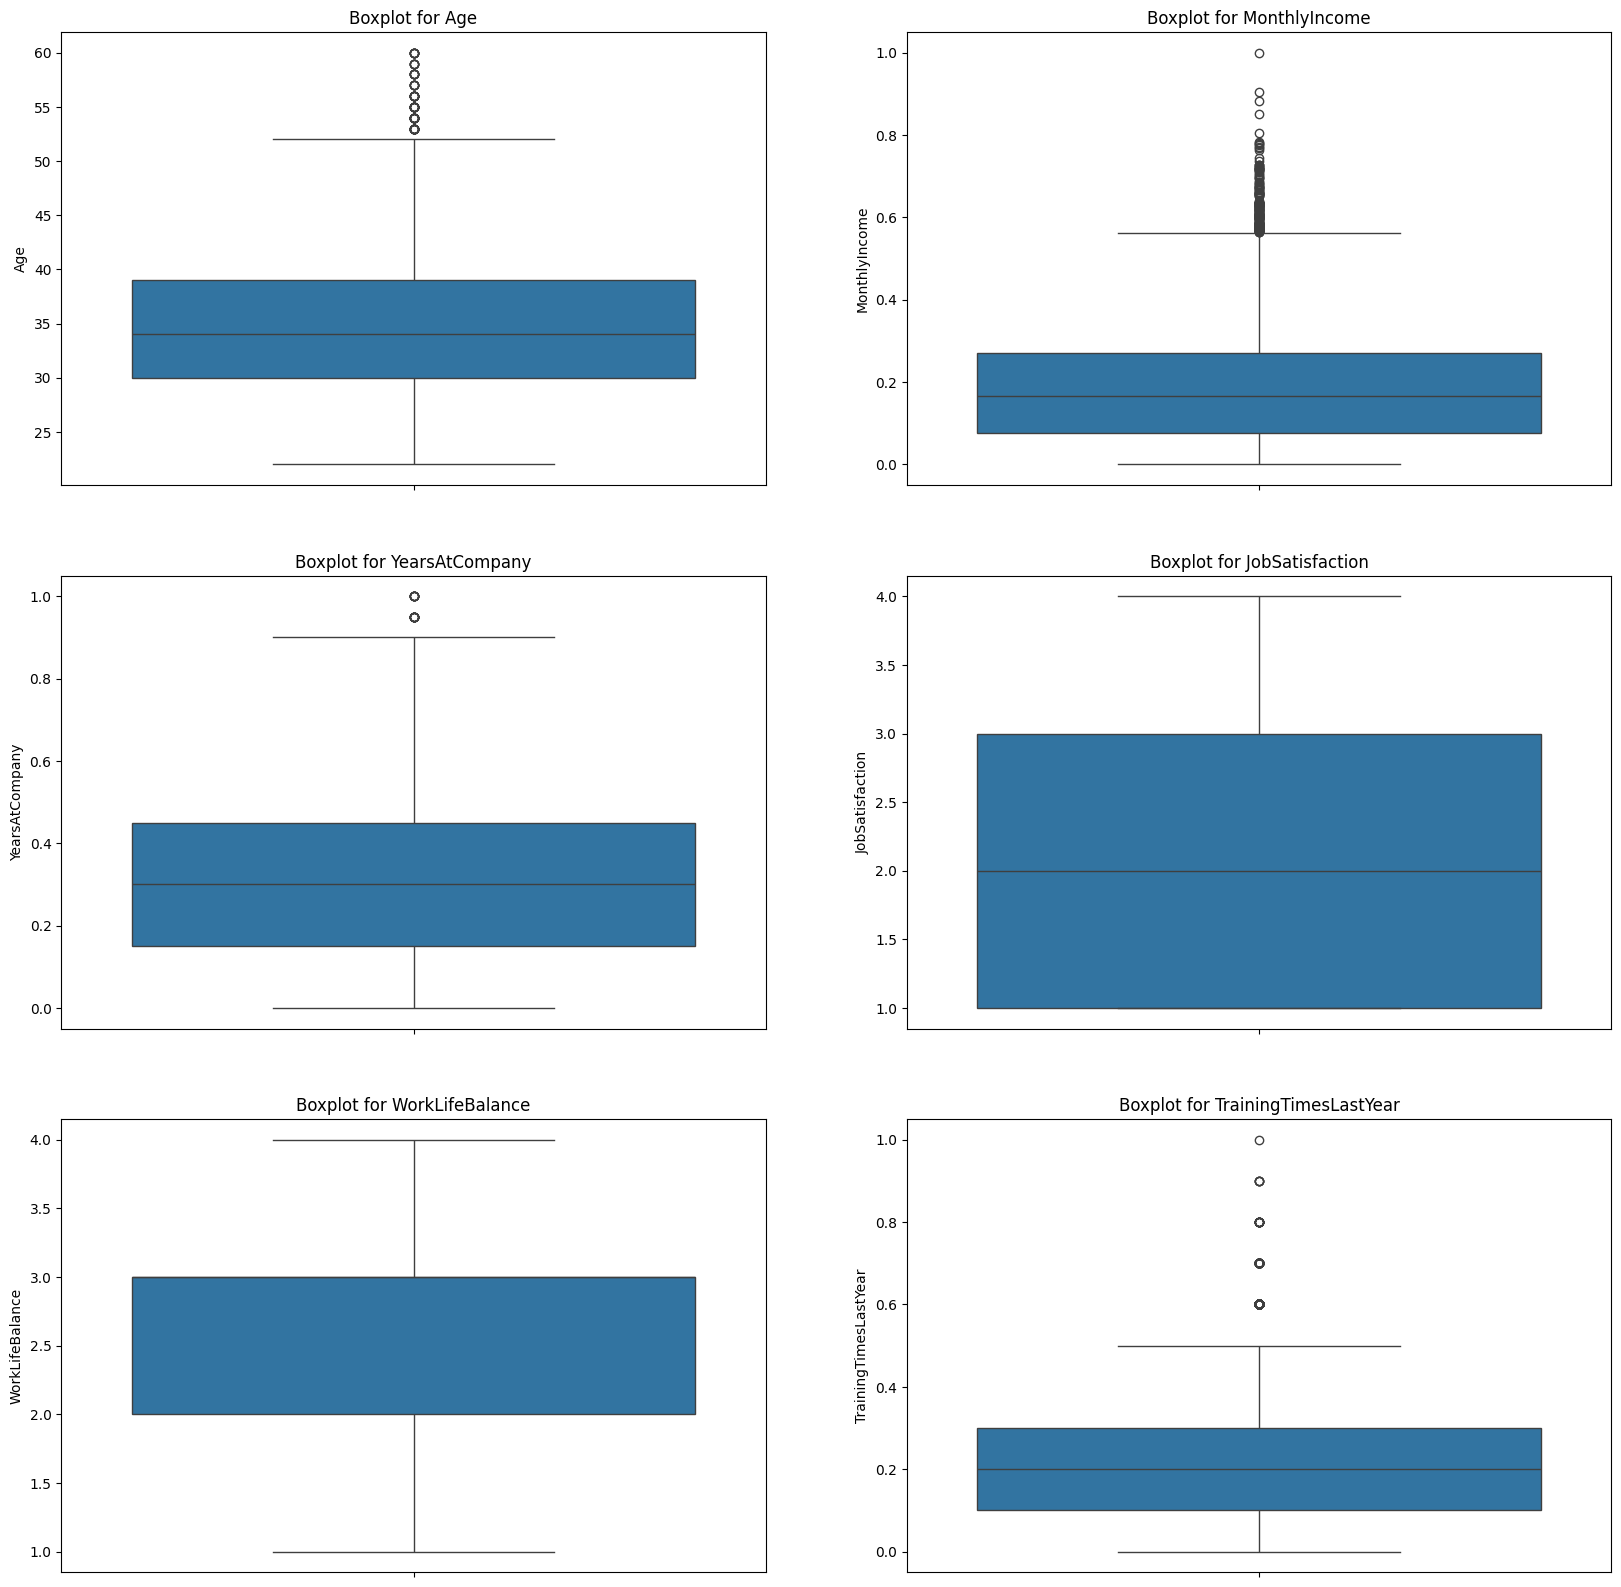

In [16]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
ax=ax.flatten()
for idx, col in enumerate(numerical_columns):
    sns.boxplot(data[col], ax=ax[idx])
    ax[idx].set_title(f"Boxplot for {col}")
plt.show()

### Lets remove the outliers on affected columns using IQR

In [17]:
affected_column = ["Age", "MonthlyIncome", "YearsAtCompany", "TrainingTimesLastYear"]

In [18]:
q1 = data[affected_column].quantile(0.25)
q3 = data[affected_column].quantile(0.75)

In [19]:
iqr = q3 - q1

In [20]:
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

In [21]:
data[affected_column] = data[affected_column].clip(lower=lower_bound, upper=upper_bound, axis=1)

### Lets verify that our data is now outlier free

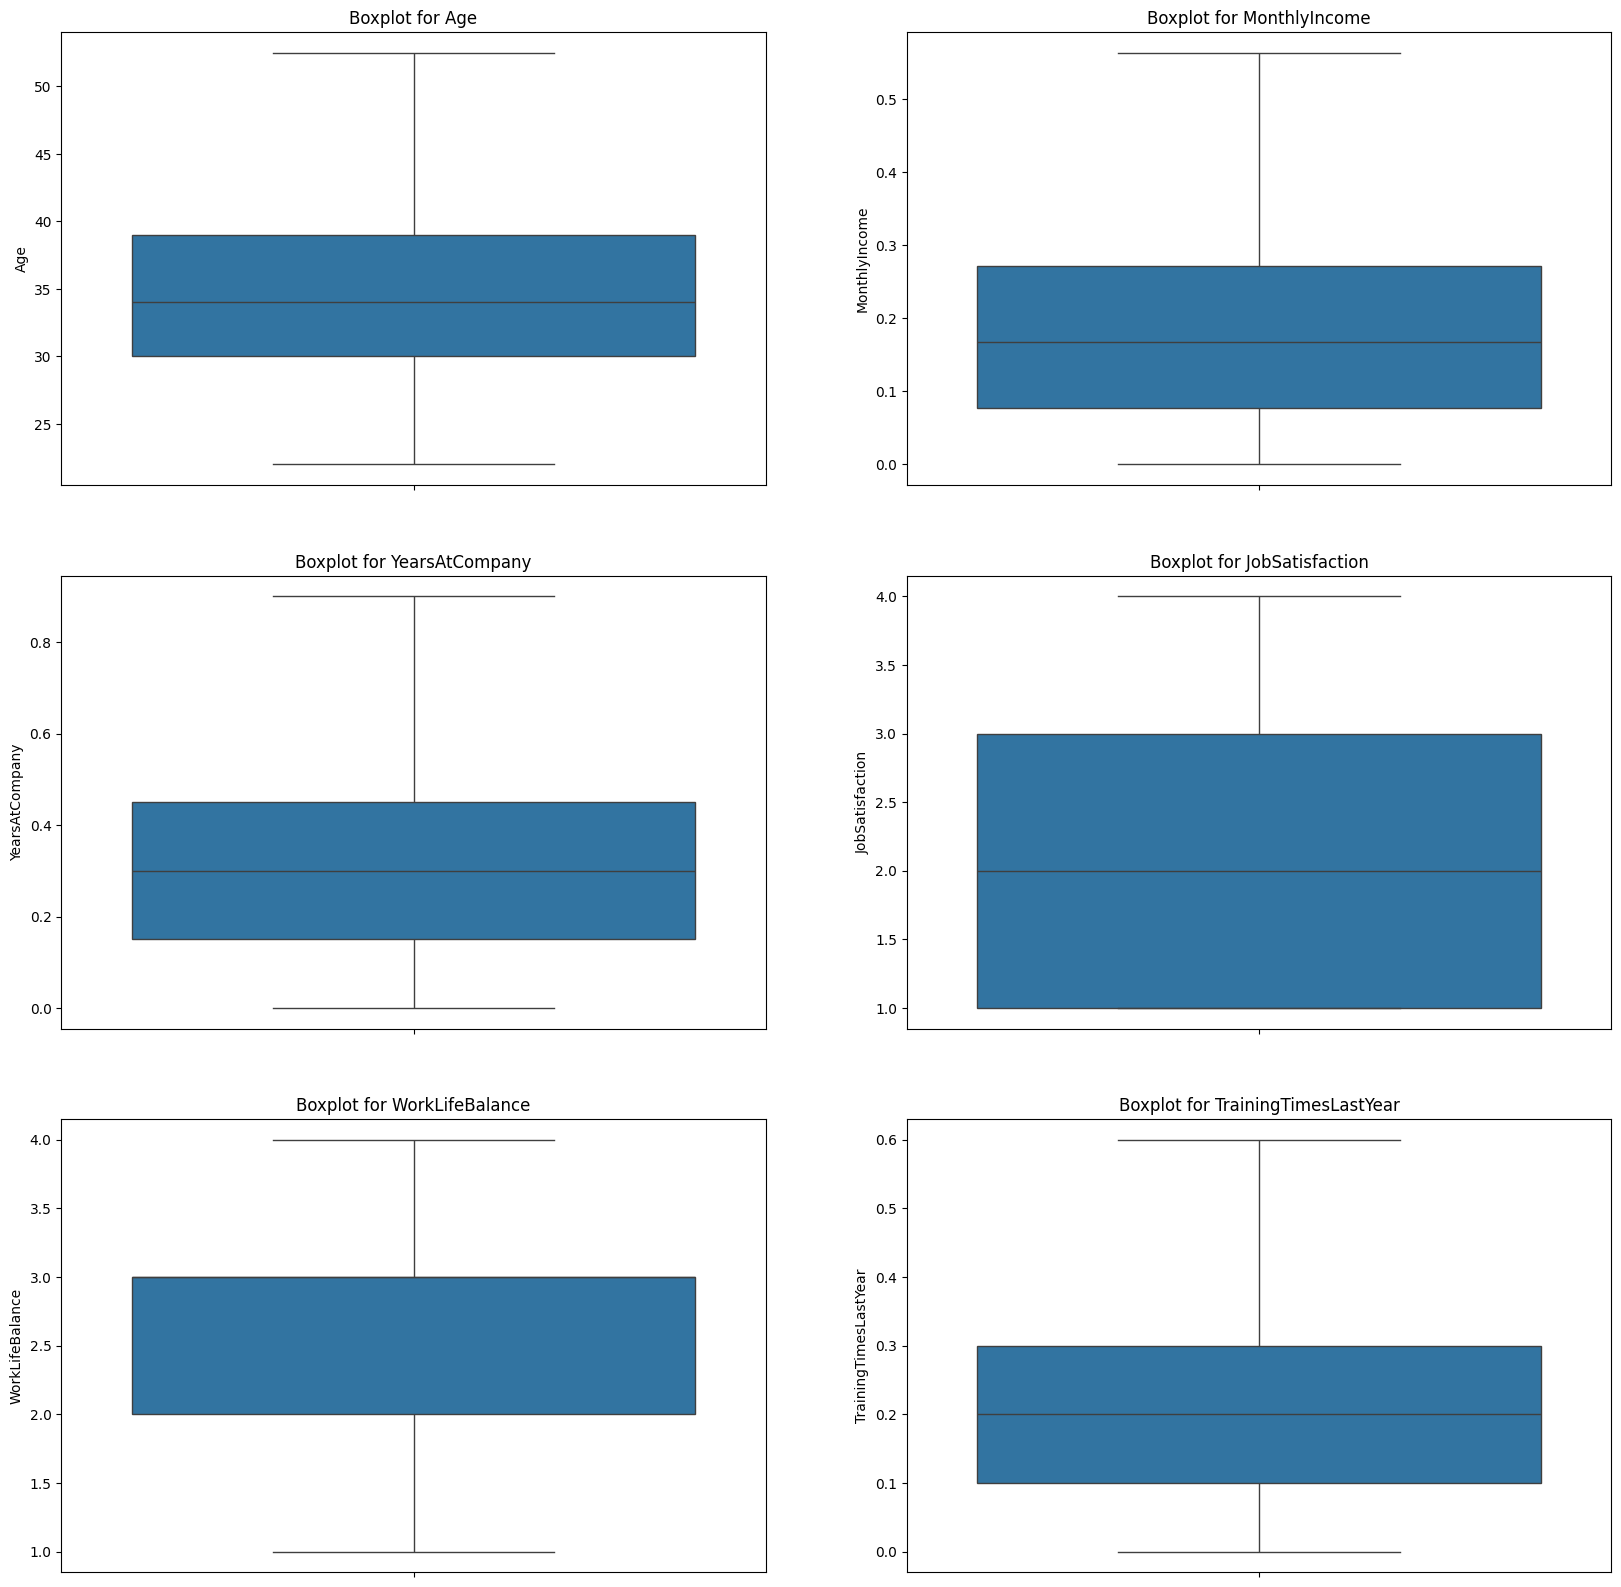

In [22]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
ax=ax.flatten()
for idx, col in enumerate(numerical_columns):
    sns.boxplot(data[col], ax=ax[idx])
    ax[idx].set_title(f"Boxplot for {col}")
plt.show()

### Encode Categorical Variables
Convert categorical variables like `Gender`, `Department`, and `OverTime` into numeric formats.

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
# Label encoding for binary categories
label_enc = LabelEncoder()
data['Gender'] = label_enc.fit_transform(data['Gender'])  
data['OverTime'] = label_enc.fit_transform(data['OverTime'])
data['Attrition'] = label_enc.fit_transform(data['Attrition'])

In [25]:
# # One-hot encoding for multi-class categorical variables
data = pd.get_dummies(data, columns=['Department'], drop_first=True)

In [26]:
# Display the transformed dataset
data.head()

,Age,Gender,MonthlyIncome,YearsAtCompany,OverTime,JobSatisfaction,WorkLifeBalance,TrainingTimesLastYear,Attrition,Department_HR,Department_IT,Department_Operations,Department_Sales
0,38.0,1,0.000000,0.40,0,2.0,3,0.5,0,1,0,0,0
1,33.0,1,0.075385,0.25,0,2.0,2,0.3,0,1,0,0,0
2,40.0,0,0.136375,0.70,0,1.0,2,0.5,0,0,0,0,1
3,47.0,1,0.174409,0.60,0,3.0,3,0.2,0,1,0,0,0
4,33.0,0,0.153290,0.20,0,1.0,3,0.1,1,0,1,0,0


### Scale Numerical Features
Scale numerical columns to bring them to a similar range, which can improve model performance.

In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [28]:
scaler = StandardScaler()
num_cols_to_scale = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'TrainingTimesLastYear']
data[num_cols_to_scale] = scaler.fit_transform(data[num_cols_to_scale])

In [29]:
# Verify scaling
data[num_cols_to_scale].describe()

,Age,MonthlyIncome,YearsAtCompany,TrainingTimesLastYear
count,7.992000e+03,7.992000e+03,7.992000e+03,7.992000e+03
mean,1.013537e-16,-1.049100e-16,2.471608e-16,-6.579099e-17
std,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00
min,-1.761989e+00,-1.301722e+00,-1.459421e+00,-1.552877e+00
25%,-6.414110e-01,-7.683502e-01,-7.232007e-01,-8.622104e-01
50%,-8.112171e-02,-1.424711e-01,1.301958e-02,-1.715433e-01
75%,6.192399e-01,5.819226e-01,7.492399e-01,5.191238e-01
max,2.510216e+00,2.607332e+00,2.957901e+00,2.591125e+00


### Check Class Distribution
Assess the balance of the target variable `(Attrition)` to determine if we need to handle class imbalance.

In [30]:
# Check class distribution
data['Attrition'].value_counts()

0    5957
1    2035
Name: Attrition, dtype: int64

In [31]:
data['Attrition'].value_counts(normalize=True)*100

0    74.537037
1    25.462963
Name: Attrition, dtype: float64

<Axes: xlabel='Attrition', ylabel='count'>

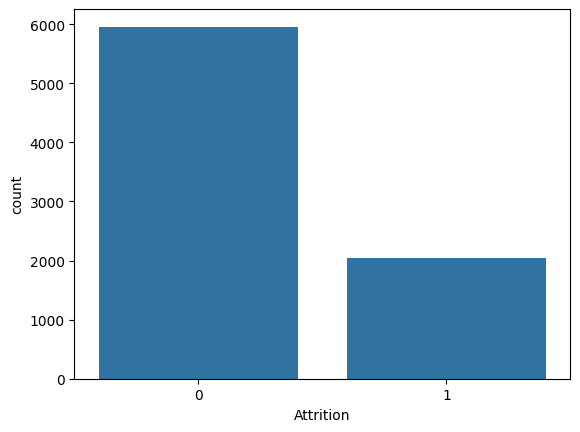

In [32]:
sns.countplot(x=data['Attrition'])

### Handling Class Imbalance
##### Techniques to Address Class Imbalance
- Resampling:
  - Oversampling the minority class using techniques like SMOTE (Synthetic Minority Oversampling Technique).
  - Undersampling the majority class to balance proportions.
- Class Weights:
    - Add weights to the classes in the loss function during model training to penalize misclassifications of the minority class.
- Evaluation Metrics:
    - Use metrics like precision, recall, F1-score, or ROC-AUC instead of just accuracy.


#### Oversampling with SMOTE

In [33]:
# pip install --upgrade imbalanced-learn

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
# Separate features and target
X = data.drop('Attrition', axis=1)
y = data['Attrition']

In [36]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [37]:
y_resampled.value_counts()

0    5957
1    5957
Name: Attrition, dtype: int64

In [38]:
y_resampled.value_counts(normalize=True)*100

0    50.0
1    50.0
Name: Attrition, dtype: float64

<Axes: xlabel='Attrition', ylabel='count'>

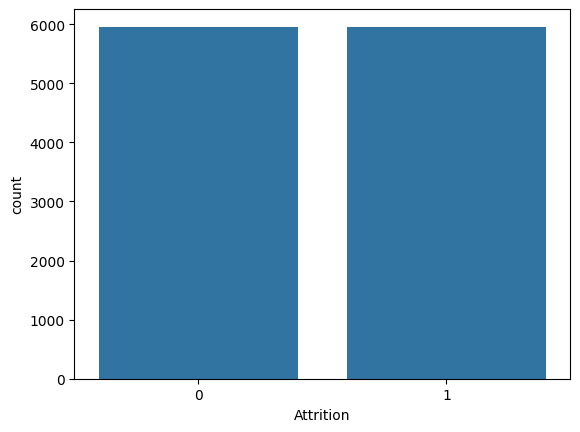

In [39]:
sns.countplot(x=y_resampled)

### Final Dataset Ready
At this stage, the dataset is clean and prepared for the next step in the workflow.

In [40]:
# Save the cleaned dataset for future use
data.to_csv('cleaned_employee_attrition_balanced.csv', index=False)

### Data Splitting
We’ll split the cleaned dataset into training and testing sets, ensuring the target variable’s distribution is representative in both.

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled  # Stratify to maintain class proportions
)

In [43]:
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 9531
Testing set size: 2383


In [44]:
# Proportion of Train set distribution
y_train.value_counts(normalize=True)*100

1    50.005246
0    49.994754
Name: Attrition, dtype: float64

In [45]:
# Proportion of Test set distribution
y_test.value_counts(normalize=True)*100

0    50.020982
1    49.979018
Name: Attrition, dtype: float64

### Model Selection
We’ll train multiple classification models to find the best one for predicting attrition. Start with a baseline and expand to more advanced models.

### 1. Train a Baseline Model (Logistic Regression)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
# Train logistic regression model
logreg = LogisticRegression(random_state=42)
# logreg = LogisticRegression(class_weight='balanced', random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [48]:
# Predict on the test set
y_pred = logreg.predict(X_test)

In [49]:
# Evaluate performance
print("Logistic Regression Classification Report:\n")
print(classification_report(y_test, y_pred))

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.55      0.59      0.57      1192
           1       0.56      0.52      0.54      1191

    accuracy                           0.56      2383
   macro avg       0.56      0.56      0.55      2383
weighted avg       0.56      0.56      0.55      2383



### 2. Train Advanced Models (Random Forest)

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
# Train random forest model
# rf = RandomForestClassifier(class_weight={0:1, 1:3}, random_state=42, n_estimators=100)
rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
# Predict on the test set
y_pred_rf = rf.predict(X_test)
# Evaluate performance
print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1192
           1       0.85      0.77      0.81      1191

    accuracy                           0.82      2383
   macro avg       0.82      0.82      0.82      2383
weighted avg       0.82      0.82      0.82      2383



### 3. Trying multiple classification models

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [53]:
# !pip install xgboost
from xgboost import XGBClassifier

In [54]:
# Define the models
# class_weights={0:1, 1:3}
class_weights='balanced'
models = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight=class_weights),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight=class_weights),
    'Support Vector Machine': SVC(random_state=42, class_weight=class_weights),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight=class_weights),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42, algorithm="SAMME"),
    'XGBoost': XGBClassifier(eval_metric='mlogloss')
}

Training Logistic Regression...
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.59      0.57      1192
           1       0.56      0.52      0.54      1191

    accuracy                           0.56      2383
   macro avg       0.56      0.56      0.56      2383
weighted avg       0.56      0.56      0.56      2383



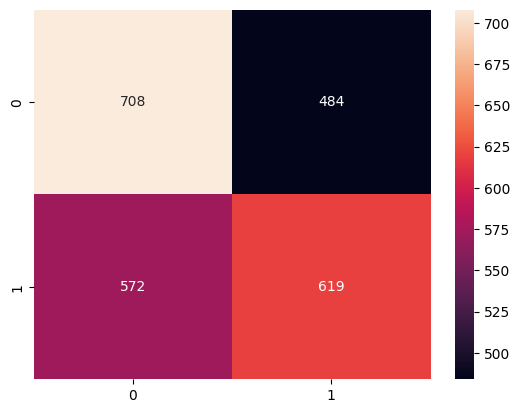

Training Random Forest...
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1192
           1       0.85      0.77      0.81      1191

    accuracy                           0.82      2383
   macro avg       0.82      0.82      0.82      2383
weighted avg       0.82      0.82      0.82      2383



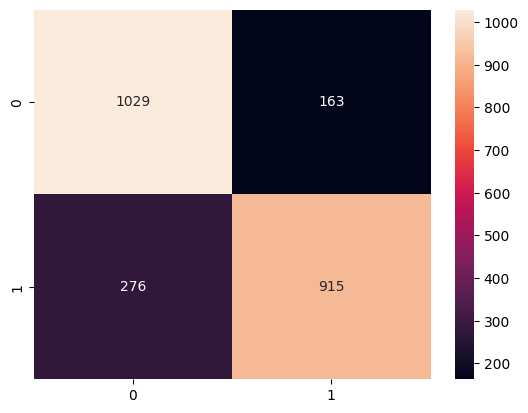

Training Support Vector Machine...
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.51      0.55      1192
           1       0.57      0.64      0.60      1191

    accuracy                           0.57      2383
   macro avg       0.58      0.57      0.57      2383
weighted avg       0.58      0.57      0.57      2383



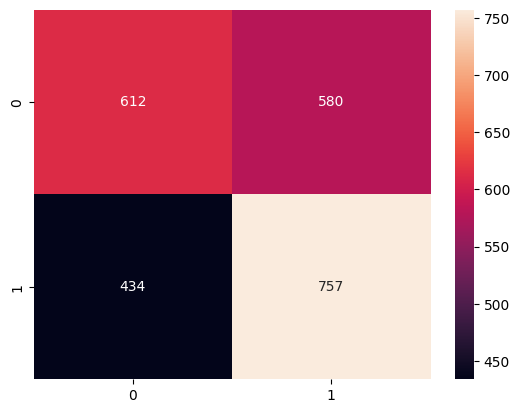

Training k-Nearest Neighbors...
k-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.53      0.63      1192
           1       0.64      0.85      0.73      1191

    accuracy                           0.69      2383
   macro avg       0.71      0.69      0.68      2383
weighted avg       0.71      0.69      0.68      2383



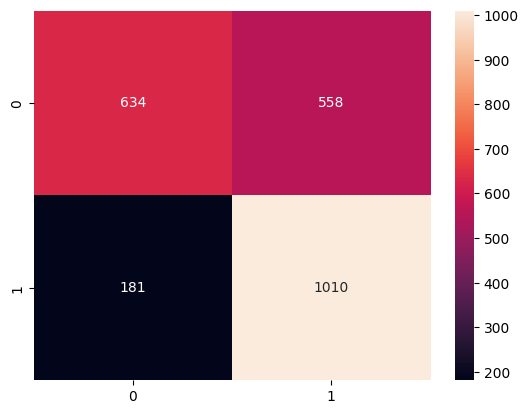

Training Decision Tree...
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.68      0.70      1192
           1       0.70      0.74      0.72      1191

    accuracy                           0.71      2383
   macro avg       0.71      0.71      0.71      2383
weighted avg       0.71      0.71      0.71      2383



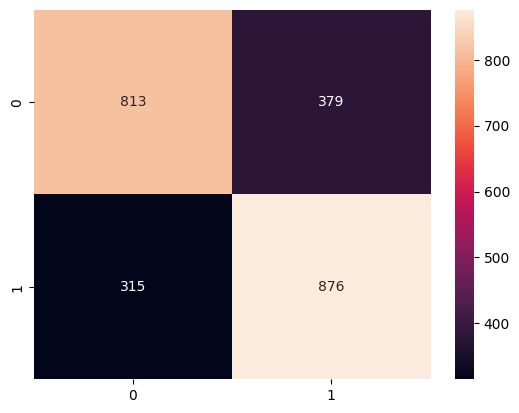

Training Gradient Boosting...
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.97      0.82      1192
           1       0.95      0.62      0.75      1191

    accuracy                           0.79      2383
   macro avg       0.83      0.79      0.79      2383
weighted avg       0.83      0.79      0.79      2383



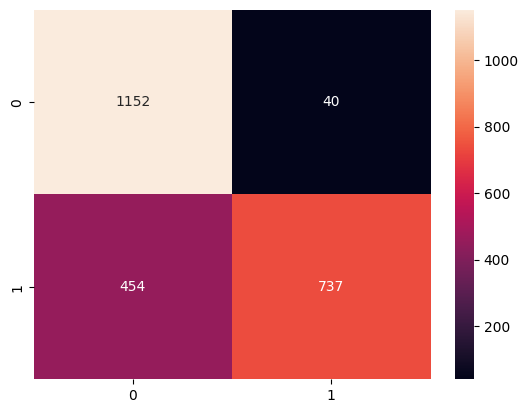

Training AdaBoost...
AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.69      0.64      1192
           1       0.63      0.52      0.57      1191

    accuracy                           0.61      2383
   macro avg       0.61      0.61      0.60      2383
weighted avg       0.61      0.61      0.60      2383



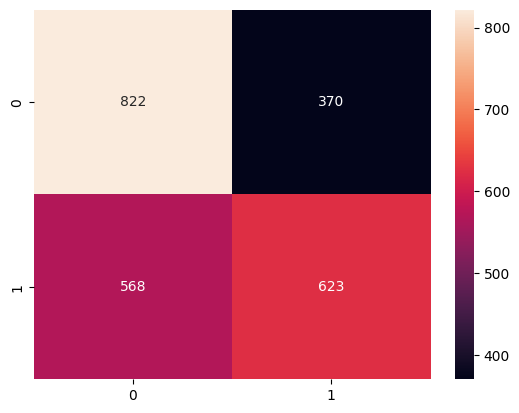

Training XGBoost...
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.87      0.80      1192
           1       0.84      0.70      0.76      1191

    accuracy                           0.78      2383
   macro avg       0.79      0.78      0.78      2383
weighted avg       0.79      0.78      0.78      2383



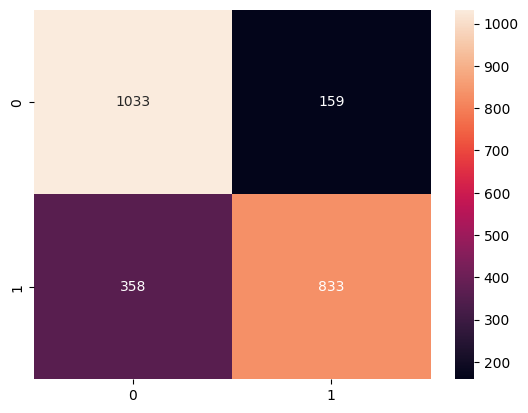

In [55]:
from sklearn.metrics import classification_report, accuracy_score

results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    
    # Store results
    results[model_name] = {
        'accuracy': accuracy,
        'classification_report': report,
        'confusion_matrix': matrix
    }
    # print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} Classification Report:\n{report}")

    sns.heatmap(matrix, annot=True, fmt="g")
    plt.show()

### 4. Hyperparameter Tuning
We’ll use grid search to optimize hyperparameters for the Random Forest model.

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [58]:
grid_search = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid, cv=5, scoring='f1', n_jobs=-1
)

In [59]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [60]:
# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [61]:
# Train best model
best_rf = grid_search.best_estimator_

In [62]:
# Predict on the test set
y_pred_best_rf = best_rf.predict(X_test)

In [63]:
# Evaluate performance
print("Tuned Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_best_rf))

Tuned Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1192
           1       0.86      0.77      0.81      1191

    accuracy                           0.82      2383
   macro avg       0.83      0.82      0.82      2383
weighted avg       0.83      0.82      0.82      2383



### Model Evaluation
We’ll perform a detailed evaluation using metrics like precision, recall, F1-score, and AUC-ROC. Confusion matrices and AUC curves will help visualize performance.

#### Confusion Matrix
Confusion matrix to visualize misclassifications.

In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
conf_matrix = confusion_matrix(y_test, y_pred_best_rf)

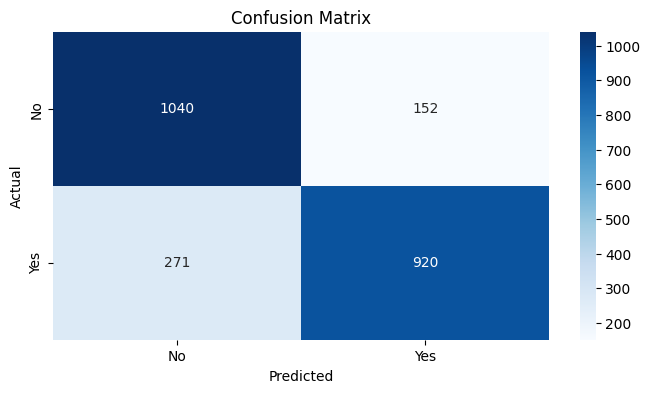

In [66]:
# Plot the confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### ROC Curve and AUC Score
ROC-AUC to evaluate the model's ability to distinguish between classes.

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score

In [68]:
# Compute probabilities for ROC
y_probs = best_rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

In [69]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

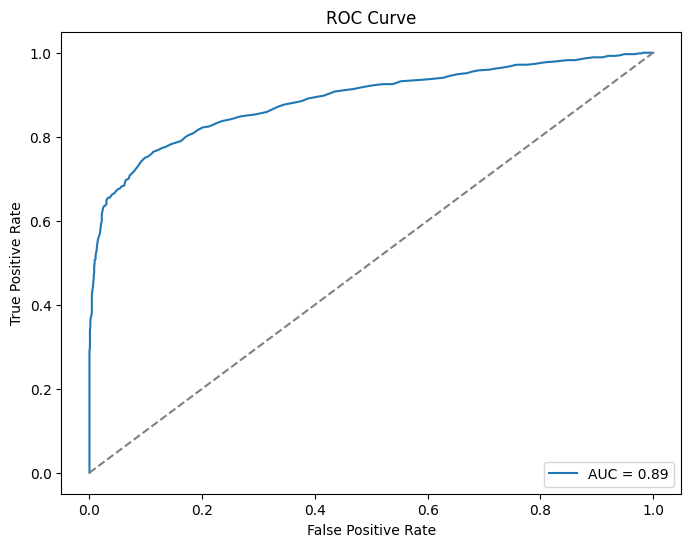

In [70]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

### 6. Using AutoML to select best model

#### Using PyCaret
PyCaret is a low-code library for automating machine learning workflows.

In [71]:
# pip install pycaret

In [72]:
# pip install scikit-learn==1.4

In [73]:
from pycaret.classification import *

In [74]:
# Combine features and target into one DataFrame
# df = pd.concat([X, y], axis=1)
df = pd.concat([X_resampled, y_resampled], axis=1)


In [75]:
df.head(2)

,Age,Gender,MonthlyIncome,YearsAtCompany,OverTime,JobSatisfaction,WorkLifeBalance,TrainingTimesLastYear,Department_HR,Department_IT,Department_Operations,Department_Sales,Attrition
0,0.479168,1,-1.301722,0.503833,0,2.0,3,1.900458,1,0,0,0,0
1,-0.221194,1,-0.778837,-0.232387,0,2.0,2,0.519124,1,0,0,0,0


In [76]:
# Initialize PyCaret
clf_setup = setup(
    data=df, 
    target='Attrition', 
    normalize=True,
    session_id=42,
    # use_gpu=True,
)

,Description,Value
0,Session id,42
1,Target,Attrition
2,Target type,Binary
3,Original data shape,"(11914, 13)"
4,Transformed data shape,"(11914, 13)"
5,Transformed train set shape,"(8339, 13)"
6,Transformed test set shape,"(3575, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [77]:
# Compare models and select the best one
best_model = compare_models(cross_validation=False, sort="f1", )

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8134,0.8775,0.7750,0.8394,0.8059,0.6268,0.6287,0.2200
et,Extra Trees Classifier,0.7955,0.8740,0.7969,0.7946,0.7958,0.5910,0.5911,0.1500
lightgbm,Light Gradient Boosting Machine,0.8129,0.8474,0.6788,0.9274,0.7838,0.6257,0.6495,0.3000
xgboost,Extreme Gradient Boosting,0.7933,0.8426,0.6973,0.8629,0.7713,0.5866,0.5977,0.1900
gbc,Gradient Boosting Classifier,0.7846,0.8237,0.5965,0.9561,0.7347,0.5692,0.6143,0.7000
dt,Decision Tree Classifier,0.7071,0.7071,0.7314,0.6974,0.7140,0.4143,0.4148,0.0400
knn,K Neighbors Classifier,0.6587,0.7225,0.7846,0.6267,0.6968,0.3175,0.3281,0.0100
dummy,Dummy Classifier,0.4999,0.5000,1.0000,0.4999,0.6665,0.0000,0.0000,0.0100
ada,Ada Boost Classifier,0.6503,0.7205,0.6021,0.6663,0.6326,0.3007,0.3021,0.1800
nb,Naive Bayes,0.5622,0.5785,0.5859,0.5593,0.5723,0.1245,0.1246,0.0100


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [78]:
# Display the best model
print(best_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [79]:
# Fine-tune the best model
tuned_model = tune_model(best_model, optimize="f1", fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7296,0.8003,0.7158,0.7361,0.7258,0.4592,0.4594
1,0.7146,0.7947,0.7110,0.7162,0.7136,0.4293,0.4293
2,0.7086,0.7784,0.7206,0.7037,0.7121,0.4173,0.4174
3,0.7320,0.7999,0.7050,0.7452,0.7246,0.4640,0.4647
4,0.7157,0.7909,0.7494,0.7022,0.7251,0.4313,0.4323
Mean,0.7201,0.7929,0.7204,0.7207,0.7202,0.4402,0.4406
Std,0.0091,0.0080,0.0154,0.0173,0.0061,0.0182,0.0183


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [80]:
# Evaluate the tuned model
evaluate_model(tuned_model, fold=5)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [81]:
# Finalize the model
final_model = finalize_model(tuned_model)

In [82]:
# Predict on the test set
predictions = predict_model(final_model, data=X_test)

#### Saving the model

In [83]:
save_model(final_model, 'final_model_attrition_prediction')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Gender', 'MonthlyIncome',
                                              'YearsAtCompany', 'OverTime',
                                              'JobSatisfaction',
                                              'WorkLifeBalance',
                                              'TrainingTimesLastYear',
                                              'Department_HR', 'Department_IT',
                                              'Department_Operations',
                                              'Department_Sales'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               co...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion=

#### Loading the model

In [84]:
loaded_model = load_model('final_model_attrition_prediction')


Transformation Pipeline and Model Successfully Loaded
